In [1]:
from graphviz import Digraph
import numpy as np 
import math as m
from scipy.optimize import linprog
import pandas as pd

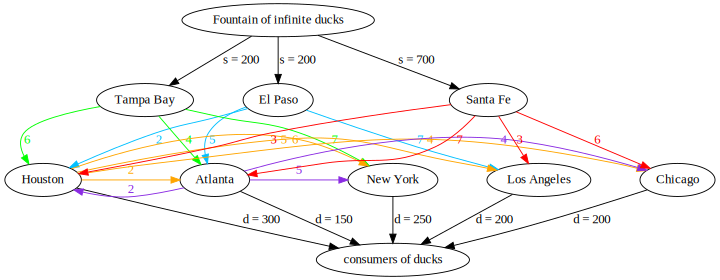

In [5]:

dot = Digraph('Duck supply chain model', format='png')
dot.attr(rankdir='TB',size="10,10!", nodesep = '.75', esep = '+20')
dot.node('s','Fountain of infinite ducks')

with dot.subgraph(name='warehouses') as c:
    c.attr(rank='same')
    c.node('E','El Paso')
    c.node('T','Tampa Bay')

with dot.subgraph(name='stores') as c:
    c.attr(rank='same')
    c.node('C','Chicago')
    c.node('L','Los Angeles')
    c.node('N','New York')
    c.node('H','Houston')
    c.node('A','Atlanta')
    
with dot.subgraph(name='lower warehouses') as c:
    c.attr(rank='same')    
    c.node('S','Santa Fe')
    
dot.node('t', 'consumers of ducks', rank = 'max')

#source to warehouse links
dot.edge('s','E',label='s = 200')
dot.edge('s','T',label='s = 200 ')
dot.edge('s','S',label='s = 700 ')

#Santa Fe outgoing routes
dot.edge('S','C',label='6', color = 'red', fontcolor = 'red')
dot.edge('S','L',label='3', color = 'red', fontcolor = 'red')
dot.edge('S','H',label='3', color = 'red', fontcolor = 'red')
dot.edge('S','A',label='7', color = 'red', fontcolor = 'red')

#El Paso outgoing routes
dot.edge('E','L',label='7', color = 'deepskyblue', fontcolor = 'deepskyblue')
dot.edge('E','H',label='2', color = 'deepskyblue', fontcolor = 'deepskyblue')
dot.edge('E','A',label='5', color = 'deepskyblue', fontcolor = 'deepskyblue')

#Tamba bay outgoing routes
dot.edge('T','N',label='7', color = 'green', fontcolor = 'green')
dot.edge('T','H',label='6', color = 'green', fontcolor = 'green')
dot.edge('T','A',label='4', color = 'green', fontcolor = 'green')

#Houston relay routes
dot.edge('H','C',label='4', color = 'orange', fontcolor = 'orange')
dot.edge('H','L',label='5', color = 'orange', fontcolor = 'orange')
dot.edge('H','N',label='6', color = 'orange', fontcolor = 'orange')
dot.edge('H','A',label='2', color = 'orange', fontcolor = 'orange')

#Atlanta relay routes
dot.edge('A','C',label='4', color = 'blueviolet', fontcolor = 'blueviolet')
dot.edge('A','N',label='5', color = 'blueviolet', fontcolor = 'blueviolet')
dot.edge('A','H',label='2', color = 'blueviolet', fontcolor = 'blueviolet')

#Comsumer demand
dot.edge('C','t', label = 'd = 200')
dot.edge('L','t', label = 'd = 200')
dot.edge('N','t', label = 'd = 250')
dot.edge('H','t', label = 'd = 300')
dot.edge('A','t', label = 'd = 150')

dot.render()
dot


In [18]:
'''in order to construct the equality matrix easily, I generated most of the matricies in excel spread sheets
and imported it as as well as the labels for the collumns for the base problem 
'''

#generate A_eq and b_eq and labels
Ab_eq_data = pd.read_excel('Midterm_Ab_eq.xlsx')
A_eq = Ab_eq_data.to_numpy()[0:16,1:26]
b_eq = Ab_eq_data.to_numpy()[:,26]

#part 6
Ab_eq_profit_data = pd.read_excel('Midterm_Ab_eq_profit.xlsx')
A_eq_p = Ab_eq_profit_data.to_numpy()[0:16,1:26]
b_eq_p = Ab_eq_profit_data.to_numpy()[:,26]

x_labels = Ab_eq_data.columns.values[1:26]



#generate c
#base problem, part 4, part 5, part 6
c = pd.read_excel('Midterm_c.xlsx').to_numpy()[0,1:]
c_LA_strike = pd.read_excel('Midterm_c.xlsx').to_numpy()[1,1:]
c_HOU_strike = pd.read_excel('Midterm_c.xlsx').to_numpy()[2,1:]
c_profit = pd.read_excel('Midterm_c.xlsx').to_numpy()[3,1:]


#generate A_ub and b_ub
#base problem
A_ub = np.zeros((25,25))
mid = np.eye(17)
A_ub[3:20,3:20] = mid

#part 6
A_ub_p = np.eye(25)



#generate the upper bount vectors
b_ub = pd.read_excel('Midterm_b_ub.xlsx').to_numpy()[0,1:]
b_ub_LA = pd.read_excel('Midterm_b_ub.xlsx').to_numpy()[1,1:]
b_ub_HOU = pd.read_excel('Midterm_b_ub.xlsx').to_numpy()[2,1:]
b_ub_p = pd.read_excel('Midterm_b_ub.xlsx').to_numpy()[3,1:]


def print_results(result, routes = False):
    #given a linear program result, prints the results
    if routes:
        for i in range(3):
            print('the warehouse',x_labels[i],'will be supplied ', np.round(result.x,decimals = 5)[i],'ducks')
        for i in range(3,20):
            print('the  route',x_labels[i],'will ship ', np.round(result.x,decimals = 5)[i],'ducks')
        for i in range(20,25):
            print('the city',x_labels[i],'will receive ', np.round(result.x,decimals = 5)[i],'ducks')
    print('shipping ducks in this manner will incur minimal monthly shipping costs of ',np.round(result.fun,decimals = 2))
    

In [10]:
#part 3    
result = linprog((1)*c,A_eq=A_eq,b_eq=b_eq,A_ub=A_ub,b_ub=b_ub)
print_results(result, True)

the warehouse s_T will be supplied  200.0 ducks
the warehouse s_E will be supplied  200.0 ducks
the warehouse s_S will be supplied  700.0 ducks
the  route r_TH will ship  0.0 ducks
the  route r_TA will ship  0.0 ducks
the  route r_TN will ship  200.0 ducks
the  route r_EH will ship  200.0 ducks
the  route r_EA will ship  0.0 ducks
the  route r_EL will ship  0.0 ducks
the  route r_SH will ship  200.0 ducks
the  route r_SA will ship  100.0 ducks
the  route r_SL will ship  200.0 ducks
the  route r_SC will ship  200.0 ducks
the  route r_HA will ship  50.0 ducks
the  route r_HN will ship  50.0 ducks
the  route r_HL will ship  0.0 ducks
the  route r_HC will ship  0.0 ducks
the  route r_AH will ship  0.0 ducks
the  route r_AN will ship  0.0 ducks
the  route r_AC will ship  0.0 ducks
the city d_H will receive  300.0 ducks
the city d_A will receive  150.0 ducks
the city d_N will receive  250.0 ducks
the city d_L will receive  200.0 ducks
the city d_C will receive  200.0 ducks
shipping ducks in 

In [3]:
#part 4
#first evaluate the new cost if the prices into LA are doubled
result_LA_cost_increase = linprog((1)*c_LA_strike,A_eq=A_eq,b_eq=b_eq,A_ub=A_ub,b_ub=b_ub)
print_results(result_LA_cost_increase)

#now evaluate the new cost if prices remain the same but the shipping quantities are lowered
result_LA_shipping_reduction = linprog((1)*c,A_eq=A_eq,b_eq=b_eq,A_ub=A_ub,b_ub=b_ub_LA)
print_results(result_LA_shipping_reduction)

shipping ducks in this manner will incur minimal monthly shipping costs of  5900.0
shipping ducks in this manner will incur minimal monthly shipping costs of  6050.0


In [17]:
#Part 5 houston
#first evaluate the new cost if the prices into HOU are doubled
result_HOU_cost_increase = linprog((1)*c_HOU_strike,A_eq=A_eq,b_eq=b_eq,A_ub=A_ub,b_ub=b_ub)
print_results(result_HOU_cost_increase, True)

#now evaluate the new cost if prices remain the same but the shipping quantities are lowered
result_HOU_shipping_reduction = linprog((1)*c,A_eq=A_eq,b_eq=b_eq,A_ub=A_ub,b_ub=b_ub_HOU)
print_results(result_HOU_shipping_reduction, True)

the warehouse s_T will be supplied  200.0 ducks
the warehouse s_E will be supplied  200.0 ducks
the warehouse s_S will be supplied  700.0 ducks
the  route r_TH will ship  0.0 ducks
the  route r_TA will ship  0.0 ducks
the  route r_TN will ship  200.0 ducks
the  route r_EH will ship  129.25776 ducks
the  route r_EA will ship  70.74224 ducks
the  route r_EL will ship  0.0 ducks
the  route r_SH will ship  196.23241 ducks
the  route r_SA will ship  103.76759 ducks
the  route r_SL will ship  200.0 ducks
the  route r_SC will ship  200.0 ducks
the  route r_HA will ship  0.0 ducks
the  route r_HN will ship  25.49017 ducks
the  route r_HL will ship  0.0 ducks
the  route r_HC will ship  0.0 ducks
the  route r_AH will ship  0.0 ducks
the  route r_AN will ship  24.50983 ducks
the  route r_AC will ship  0.0 ducks
the city d_H will receive  300.0 ducks
the city d_A will receive  150.0 ducks
the city d_N will receive  250.0 ducks
the city d_L will receive  200.0 ducks
the city d_C will receive  200.0

<ipython-input-17-dd966e4ed0fe>:7: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  result_HOU_shipping_reduction = linprog((1)*c,A_eq=A_eq,b_eq=b_eq,A_ub=A_ub,b_ub=b_ub_HOU)
<ipython-input-17-dd966e4ed0fe>:7: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  result_HOU_shipping_reduction = linprog((1)*c,A_eq=A_eq,b_eq=b_eq,A_ub=A_ub,b_ub=b_ub_HOU)


In [19]:
#part 6
def print_results_p(result, routes = False):
    #modified print function to deal with slightly different real world implications of the problem 
    if routes:
        for i in range(3):
            print('the warehouse',x_labels[i],'will produce ', np.round(result.x,decimals = 5)[i],'ducks')
        for i in range(3,20):
            print('the  route',x_labels[i],'will ship ', np.round(result.x,decimals = 5)[i],'ducks')
        for i in range(20,25):
            print('the city',x_labels[i],'will receive ', np.round(result.x,decimals = 5)[i],'ducks')
    print('shipping ducks in this manner will incur a monthly profit of',(-1)*np.round(result.fun,decimals = 2))
    
result_p = linprog((-1)*c_profit   ,A_eq=A_eq_p    ,b_eq=b_eq_p   ,A_ub=A_ub_p   ,b_ub=b_ub_p)
print_results_p(result_p,True)

the warehouse s_T will produce  50.0 ducks
the warehouse s_E will produce  200.0 ducks
the warehouse s_S will produce  400.0 ducks
the  route r_TH will ship  0.0 ducks
the  route r_TA will ship  0.0 ducks
the  route r_TN will ship  50.0 ducks
the  route r_EH will ship  200.0 ducks
the  route r_EA will ship  0.0 ducks
the  route r_EL will ship  0.0 ducks
the  route r_SH will ship  0.0 ducks
the  route r_SA will ship  0.0 ducks
the  route r_SL will ship  200.0 ducks
the  route r_SC will ship  200.0 ducks
the  route r_HA will ship  0.0 ducks
the  route r_HN will ship  200.0 ducks
the  route r_HL will ship  0.0 ducks
the  route r_HC will ship  0.0 ducks
the  route r_AH will ship  0.0 ducks
the  route r_AN will ship  0.0 ducks
the  route r_AC will ship  0.0 ducks
the city d_H will receive  0.0 ducks
the city d_A will receive  0.0 ducks
the city d_N will receive  250.0 ducks
the city d_L will receive  200.0 ducks
the city d_C will receive  200.0 ducks
shipping ducks in this manner will incur